In [1]:
'''

This code demonstrates the working of the Markov Chain Monte Carlo Metropolis-Hastings Method, or MCMC-MH.
MCMC-MH can be used to accurately predict the posterior distribution given prior knowledge(a prior) and 
data.

This example will evaluate/approximate the distribution of the standard deviation of a set of a data. 

Nolan Strauss
email: solannauss@gmail.com

'''

'\n\nThis code demonstrates the working of the Markov Chain Monte Carlo Metropolis-Hastings Method, or MCMC-MH.\nMCMC-MH can be used to accurately predict the posterior distribution given prior knowledge(a prior) and \ndata.\n\nThis example will evaluate/approximate the distribution of the standard deviation of a set of a data. \n\nNolan Strauss\nemail: solannauss@gmail.com\n\n'

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
np.random.seed(5234124)

In [3]:
'''
Transition model determines the distribution of which the next standard deviation is sampled from.

x[0] --> mean
x[1] --> standard deviation

std_dev_MCMC --> Standard deviation of the distribution that the next standard deviation is sampled from. In more
complex MCMC algorithms, this value may not be constant and may be a dynamically determined value.
'''

std_dev_MCMC = 0.5
transition_model_std = lambda x: [x[0], np.random.normal(x[1], std_dev_MCMC, 1)[0]]



In [4]:
'''
This function computes the log liklihood of the model given the data. In this case, our model is a normal distri-
bution with a set mean value and the parameter we are trying to approximate being the standard deviation.

standard deviation --> θ, parameter of interest that is being sampled

If the standard deviation is a negative value, of which it cannot be, the log likelihood value returned is negat-
ive infinity.
'''

def compute_log_likelihood(data, x):
    
    if x[1] <= 0:
        return -np.inf

    else:
        
        log_likelihood = np.log(scipy.stats.norm(x[0],x[1]).pdf(data)).sum()
    
    return log_likelihood



In [5]:
'''
x is the previous value of the standard deviation and x_prime is the current value.
'''

def logic(x_like, x_prime_like):
    
    acceptance_val = np.random.uniform(0,1,1)[0]
    #print(acceptance_val)
    if np.exp(x_prime_like - x_like) > acceptance_val:
        return True
    else:
        return False
    

In [6]:
'''
Markov Chain Monte Carlo Matropolis-Hasting Algorithm
'''

def MCMC_MH(data, init_mu, init_sigma, iterations, transition_model):
    
    accepted = []
    accepted_iterations = []
    rejected = []
    rejected_iterations = []
    
    x = [init_mu, init_sigma]

    for i in range(iterations):
            
        x_like = compute_log_likelihood(data,x)
        
        x_prime = transition_model(x)
        
        print(x, x_prime)
        
        x_prime_like = compute_log_likelihood(data,x_prime)
        
        accept = logic(x_like, x_prime_like)
        
        if accept == True:
            
            accepted.append(x_prime)
            accepted_iterations.append(i)
            
            x = x_prime
        
        else:
            
            rejected.append(x_prime)
            rejected_iterations.append(i)
            
    return accepted, rejected, accepted_iterations, rejected_iterations
    

10.013977357484258


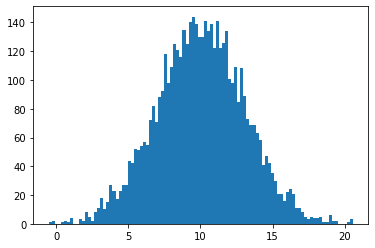

In [7]:
'''
This section generates a random set of data from a given distribution and computes the mean of the data.
'''

true_mu = 10
true_sigma = 3

data = np.random.normal(true_mu,true_sigma,5000)

pop_mean = np.mean(data)
print(pop_mean)
plt.hist(data, bins=100)
plt.show()

In [8]:
std_guessed = 1

accepted, rejected, accepted_iterations, rejected_iterations = MCMC_MH(data, pop_mean, std_guessed, 5000, 
                                                                                   transition_model_std)

[10.013977357484258, 1] [10.013977357484258, 2.2503113879831638]
[10.013977357484258, 2.2503113879831638] [10.013977357484258, 1.9615126093447806]
[10.013977357484258, 2.2503113879831638] [10.013977357484258, 2.2057705927897633]
[10.013977357484258, 2.2503113879831638] [10.013977357484258, 2.276150859336372]
[10.013977357484258, 2.276150859336372] [10.013977357484258, 2.815176057223659]
[10.013977357484258, 2.815176057223659] [10.013977357484258, 1.9290089060597655]
[10.013977357484258, 2.815176057223659] [10.013977357484258, 3.151761982706485]
[10.013977357484258, 3.151761982706485] [10.013977357484258, 2.4044600078246794]
[10.013977357484258, 3.151761982706485] [10.013977357484258, 3.1882589739940874]
[10.013977357484258, 3.151761982706485] [10.013977357484258, 2.8187638923078113]
[10.013977357484258, 3.151761982706485] [10.013977357484258, 2.9179406736461155]
[10.013977357484258, 2.9179406736461155] [10.013977357484258, 1.9982462818074906]
[10.013977357484258, 2.9179406736461155] [1

/Users/nolanstrauss/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


[10.013977357484258, 3.019702367117772] [10.013977357484258, 2.837168632141061]
[10.013977357484258, 3.019702367117772] [10.013977357484258, 3.3258346074662115]
[10.013977357484258, 3.019702367117772] [10.013977357484258, 3.4103394263596556]
[10.013977357484258, 3.019702367117772] [10.013977357484258, 3.0279215709216185]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 4.095927400231394]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 2.081813872945644]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 2.914691206345543]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 2.9540911098148133]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 3.2204519022367193]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 3.2674342613666205]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 2.5524542419663407]
[10.013977357484258, 3.0279215709216185] [10.013977357484258, 3.2059615689485907]
[10.013977357484258, 3.0

[10.013977357484258, 3.0362058282046887] [10.013977357484258, 3.0175899788660145]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 3.5641141598248245]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.48474830416785]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.885585492603593]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 3.195648555012601]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 3.440897316349723]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.372576917108778]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.9465665395325185]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.833659548785861]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 2.6936235327771327]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 3.1373415789576544]
[10.013977357484258, 3.0175899788660145] [10.013977357484258, 3.060465937263639]
[10.013977357484258, 3.0

[10.013977357484258, 3.071939617442737] [10.013977357484258, 2.6782039035684972]
[10.013977357484258, 3.071939617442737] [10.013977357484258, 2.248724445709375]
[10.013977357484258, 3.071939617442737] [10.013977357484258, 2.5527558160184944]
[10.013977357484258, 3.071939617442737] [10.013977357484258, 3.0243028738628808]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.5517096204130967]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.2639704377845415]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.624890213554773]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.739452354175744]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 2.385391530123907]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.3241109860853877]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 3.45685544691115]
[10.013977357484258, 3.0243028738628808] [10.013977357484258, 2.621624870275924]
[10.013977357484258, 3.0243

[10.013977357484258, 3.0601234184650625] [10.013977357484258, 4.121097618728062]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.196184776334339]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.3781101188962825]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 2.9537174589967634]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.208109127887089]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.130618652968509]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 2.5770765991944113]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 2.7550873365756146]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.1397239288925416]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 2.8573755159632865]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 3.1119306964506896]
[10.013977357484258, 3.0601234184650625] [10.013977357484258, 4.3187010479889185]
[10.013977357484258,

[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.7137615786509306]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.05912212822541]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.2778087159384715]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.5048386308115353]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 2.4658321276556476]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 2.711591250700643]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.660931014122045]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 2.8922698106520235]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.0599783842925765]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 2.638177984775055]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 3.6640237000706954]
[10.013977357484258, 3.019972679558179] [10.013977357484258, 2.2533482219220566]
[10.013977357484258, 3.0199726795

[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.1490317669736307]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 2.89975762633116]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.5273854905380677]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.5340143482389594]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.2666882107945083]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 2.902657082059882]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.4312818561255303]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 2.4940849793672952]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.662918478511825]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.259349426382663]
[10.013977357484258, 3.0321167374818065] [10.013977357484258, 3.0542284244945783]
[10.013977357484258, 3.0542284244945783] [10.013977357484258, 3.60681094993579]
[10.013977357484258, 3.

[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.310375656523099]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.2659124676368396]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 2.799194083718401]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 2.8475189003918735]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 2.908795161899061]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.661402116256745]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.1223758619359043]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 2.9412635871617194]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 2.0251476573219787]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.6618418158477484]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.236873829629861]
[10.013977357484258, 3.1130596350303485] [10.013977357484258, 3.6823082774471034]
[10.013977357484258, 

[10.013977357484258, 3.0142740014888294] [10.013977357484258, 3.878015492768853]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 3.2864769583528495]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.4253219753931194]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.8510582393642534]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.576168148764914]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 4.200888532820438]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.6333888765103133]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.6390095148365043]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 3.275583023040364]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.805573031471666]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 2.442535130123899]
[10.013977357484258, 3.0142740014888294] [10.013977357484258, 3.1295001629142694]
[10.013977357484258, 3

[10.013977357484258, 2.9999440967552613] [10.013977357484258, 2.857068127763063]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.519049483925007]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.313576653223311]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.757789290042496]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.4131830694980967]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.1176864287339026]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.3413363272464216]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 2.201118263298478]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 2.706669973624217]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 1.8464165181295615]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 2.5637708257998324]
[10.013977357484258, 2.9999440967552613] [10.013977357484258, 3.053965408025949]
[10.013977357484258, 3.

[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.1524681751224577]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 2.5705498291308406]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 2.774680050093989]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.3043857106907413]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.8142143094404144]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.590654196880397]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.3670662510869573]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.5265686398640774]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 2.713903647427167]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.339855170000397]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 3.187900711233103]
[10.013977357484258, 3.058873193012648] [10.013977357484258, 2.870633953426543]
[10.013977357484258, 3.05887319301

[10.013977357484258, 3.069100839800382] [10.013977357484258, 3.0510069226361045]
[10.013977357484258, 3.0510069226361045] [10.013977357484258, 3.1320251137154873]
[10.013977357484258, 3.0510069226361045] [10.013977357484258, 2.9180002926731854]
[10.013977357484258, 3.0510069226361045] [10.013977357484258, 3.2684622566207935]
[10.013977357484258, 3.0510069226361045] [10.013977357484258, 3.060077447498974]
[10.013977357484258, 3.060077447498974] [10.013977357484258, 3.3522978999840602]
[10.013977357484258, 3.060077447498974] [10.013977357484258, 3.527457037061879]
[10.013977357484258, 3.060077447498974] [10.013977357484258, 3.06811488784462]
[10.013977357484258, 3.060077447498974] [10.013977357484258, 3.0458236029398535]
[10.013977357484258, 3.0458236029398535] [10.013977357484258, 3.3352888157793115]
[10.013977357484258, 3.0458236029398535] [10.013977357484258, 2.4230078990710684]
[10.013977357484258, 3.0458236029398535] [10.013977357484258, 3.1418947790033713]
[10.013977357484258, 3.04

[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.4347380096636506]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.6009919474289553]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.7835129469863564]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 2.433938851826865]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.111715907399349]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 2.323155262893451]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.719888976889094]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.8498004395558603]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 3.7562638273012645]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 2.9351714056483025]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 2.7151694017369667]
[10.013977357484258, 2.986674504583962] [10.013977357484258, 2.810969784606092]
[10.013977357484258, 2.9866745045

[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.3510522584518077]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.4322844646455954]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.1597435826373874]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 4.173453439601293]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.3601229388127245]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.6859362110450937]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 2.251561567406841]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.451966451731968]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.6105377949258575]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.653602125835804]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 2.8263887207627834]
[10.013977357484258, 3.043773385837938] [10.013977357484258, 3.2679576877451177]
[10.013977357484258, 3.043773385

[10.013977357484258, 3.0402993958200764] [10.013977357484258, 2.3760452821112867]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.423187349130977]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.284266426578575]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.34464302309892]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 1.8696232619196598]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.606158209549891]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 2.566863900293799]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 2.7960171555109508]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 2.293594611871219]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 2.688301329030052]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.139668537722838]
[10.013977357484258, 3.0402993958200764] [10.013977357484258, 3.44049021495534]
[10.013977357484258, 3.0402

[10.013977357484258, 3.0937297555679053] [10.013977357484258, 2.835614805415797]
[10.013977357484258, 3.0937297555679053] [10.013977357484258, 3.3771280721506995]
[10.013977357484258, 3.0937297555679053] [10.013977357484258, 2.8951084944776433]
[10.013977357484258, 3.0937297555679053] [10.013977357484258, 2.3067617413487804]
[10.013977357484258, 3.0937297555679053] [10.013977357484258, 2.8811847635004844]
[10.013977357484258, 3.0937297555679053] [10.013977357484258, 3.0710657888033457]
[10.013977357484258, 3.0710657888033457] [10.013977357484258, 2.8664398819799457]
[10.013977357484258, 3.0710657888033457] [10.013977357484258, 3.0524701848891564]
[10.013977357484258, 3.0524701848891564] [10.013977357484258, 2.7920172965818293]
[10.013977357484258, 3.0524701848891564] [10.013977357484258, 3.4584039296143025]
[10.013977357484258, 3.0524701848891564] [10.013977357484258, 3.1961894566053446]
[10.013977357484258, 3.0524701848891564] [10.013977357484258, 2.460575727365607]
[10.01397735748425

[10.013977357484258, 3.0620421208760855] [10.013977357484258, 3.0190827752872775]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 3.7357557228574296]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 3.4460709526778786]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 2.893905469550543]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 3.3865753372930434]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 2.156065932140976]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 3.059687088712751]
[10.013977357484258, 3.0190827752872775] [10.013977357484258, 3.0518659499624867]
[10.013977357484258, 3.0518659499624867] [10.013977357484258, 2.6808760348523797]
[10.013977357484258, 3.0518659499624867] [10.013977357484258, 3.537744180132826]
[10.013977357484258, 3.0518659499624867] [10.013977357484258, 3.956598797829485]
[10.013977357484258, 3.0518659499624867] [10.013977357484258, 2.905934278725149]
[10.013977357484258, 3

[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.6877452546648546]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 4.1832081838769675]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 2.621105806346274]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.4090590929442106]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 2.5561634588676405]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 2.269591013185142]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.6554197827755486]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.4933370382321285]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.3064185979673013]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 3.573638755314597]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 2.332723538963492]
[10.013977357484258, 3.049166947096478] [10.013977357484258, 2.373249332307631]
[10.013977357484258, 3.0491669470

[10.013977357484258, 3.063946971798104] [10.013977357484258, 2.530936223864695]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 3.771544125576915]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 2.5596769502832597]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 2.956040136516779]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 3.158802058212558]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 3.664271613348203]
[10.013977357484258, 3.063946971798104] [10.013977357484258, 3.075421851726135]
[10.013977357484258, 3.075421851726135] [10.013977357484258, 3.268649792147661]
[10.013977357484258, 3.075421851726135] [10.013977357484258, 3.6953596681659104]
[10.013977357484258, 3.075421851726135] [10.013977357484258, 3.544247140988636]
[10.013977357484258, 3.075421851726135] [10.013977357484258, 3.1628998314341]
[10.013977357484258, 3.075421851726135] [10.013977357484258, 3.0522418667450864]
[10.013977357484258, 3.0522418667450864

[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.3537963705050062]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 2.722398362499707]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 2.708523651830297]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.3511908100175862]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 2.4144767371109994]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.3679403112241104]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.6543571744778194]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 2.634932587062418]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.3698160305785523]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 3.421940411228449]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 4.286096468587984]
[10.013977357484258, 2.9789039173572065] [10.013977357484258, 2.1021464598686386]
[10.013977357484258, 

[10.013977357484258, 3.0760063601446412] [10.013977357484258, 2.4027106287025295]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 2.8048649430270167]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 1.8997292678605364]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 3.5636193387722717]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 3.515273757982406]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 1.9073215553692773]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 1.9977897616071418]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 4.252607954767475]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 3.0971006501481786]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 2.80903579762402]
[10.013977357484258, 3.0760063601446412] [10.013977357484258, 3.0261686191606025]
[10.013977357484258, 3.0261686191606025] [10.013977357484258, 3.212257515381544]
[10.013977357484258, 

[10.013977357484258, 2.9924971777796037] [10.013977357484258, 3.924296352032817]
[10.013977357484258, 2.9924971777796037] [10.013977357484258, 3.066144384836375]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 2.9416508762588074]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 2.7515200569704374]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 2.7157963714904465]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 3.487312819658227]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 3.3089363123431728]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 3.1331611752081074]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 3.1184840637201185]
[10.013977357484258, 3.066144384836375] [10.013977357484258, 3.0040045046463444]
[10.013977357484258, 3.0040045046463444] [10.013977357484258, 2.852647169598035]
[10.013977357484258, 3.0040045046463444] [10.013977357484258, 2.3402770397971078]
[10.013977357484258, 3.00400

[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.940403483868068]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.7541228700527065]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.5833246601721775]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.712895710149274]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.6065184008690974]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.3294953211353806]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.7715979145396146]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.5398872520423463]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.758682472301526]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.2818293212039107]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 2.8252694455317178]
[10.013977357484258, 3.0286116210180825] [10.013977357484258, 3.7793883298157716]
[10.013977357484258

[10.013977357484258, 2.990095112494156] [10.013977357484258, 3.421320291980957]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.5485396466484964]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.4976142484498967]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 3.1154310753779093]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.862269298133811]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.844673210326217]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 3.289077018082574]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.7255417173030647]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.9477883015579196]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.900258156075325]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 2.822191431996702]
[10.013977357484258, 2.990095112494156] [10.013977357484258, 3.136697892718165]
[10.013977357484258, 2.990095112494

[10.013977357484258, 3.0372991737103496] [10.013977357484258, 3.04785122230001]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 2.532098820493288]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 2.7675805981842174]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 3.7260199830039165]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 1.9250382428684174]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 2.0934813693210375]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 2.1088930272504967]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 2.6594801174047626]
[10.013977357484258, 3.04785122230001] [10.013977357484258, 3.0535953339227517]
[10.013977357484258, 3.0535953339227517] [10.013977357484258, 2.8816655908188387]
[10.013977357484258, 3.0535953339227517] [10.013977357484258, 2.870549129371566]
[10.013977357484258, 3.0535953339227517] [10.013977357484258, 2.915757433325483]
[10.013977357484258, 3.05359533392275

[10.013977357484258, 3.0549157851088062] [10.013977357484258, 2.7892386329287344]
[10.013977357484258, 3.0549157851088062] [10.013977357484258, 2.9629439180563186]
[10.013977357484258, 3.0549157851088062] [10.013977357484258, 3.068637174966798]
[10.013977357484258, 3.068637174966798] [10.013977357484258, 2.9773612194025367]
[10.013977357484258, 2.9773612194025367] [10.013977357484258, 2.578242069788117]
[10.013977357484258, 2.9773612194025367] [10.013977357484258, 3.549401306009966]
[10.013977357484258, 2.9773612194025367] [10.013977357484258, 2.1976755207586915]
[10.013977357484258, 2.9773612194025367] [10.013977357484258, 3.065021144160215]
[10.013977357484258, 3.065021144160215] [10.013977357484258, 2.262121646407062]
[10.013977357484258, 3.065021144160215] [10.013977357484258, 3.1717802539560735]
[10.013977357484258, 3.065021144160215] [10.013977357484258, 2.630459392366796]
[10.013977357484258, 3.065021144160215] [10.013977357484258, 2.9731202416575706]
[10.013977357484258, 3.0650

[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.8468705159574794]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.9025683092974033]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.3024643125446858]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.085455296209054]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.591493393556668]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.6383582000023496]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.3852562146799174]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.0773485399074834]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.9370204290658557]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.194491629724482]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 2.9843503392651467]
[10.013977357484258, 3.0315833030135653] [10.013977357484258, 3.1755225895418433]
[10.013977357484258

[10.013977357484258, 3.071305417349705] [10.013977357484258, 2.171224857494834]
[10.013977357484258, 3.071305417349705] [10.013977357484258, 2.5001087885225726]
[10.013977357484258, 3.071305417349705] [10.013977357484258, 2.259400853410637]
[10.013977357484258, 3.071305417349705] [10.013977357484258, 3.0353463642351852]
[10.013977357484258, 3.0353463642351852] [10.013977357484258, 2.435485130194199]
[10.013977357484258, 3.0353463642351852] [10.013977357484258, 3.4362829737370317]
[10.013977357484258, 3.0353463642351852] [10.013977357484258, 3.5141890762235497]
[10.013977357484258, 3.0353463642351852] [10.013977357484258, 2.2171485780793967]
[10.013977357484258, 3.0353463642351852] [10.013977357484258, 3.017770022752817]
[10.013977357484258, 3.017770022752817] [10.013977357484258, 2.848386409112884]
[10.013977357484258, 3.017770022752817] [10.013977357484258, 3.266421220697422]
[10.013977357484258, 3.017770022752817] [10.013977357484258, 3.120606666523642]
[10.013977357484258, 3.0177700

[10.013977357484258, 3.0047526355404837] [10.013977357484258, 3.8505598715721643]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.5677269612818066]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 3.2006644039009493]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.5337104948704545]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.831055613740363]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.5912516503778122]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.1063202452122534]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 3.35524062583685]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 3.3574415518890435]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.4963601702781597]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.580266655560866]
[10.013977357484258, 3.0047526355404837] [10.013977357484258, 2.4664179672848277]
[10.013977357484258,

[10.013977357484258, 3.0193391312927185] [10.013977357484258, 3.6650699114386875]
[10.013977357484258, 3.0193391312927185] [10.013977357484258, 3.2798256016073766]
[10.013977357484258, 3.0193391312927185] [10.013977357484258, 2.1915765295686453]
[10.013977357484258, 3.0193391312927185] [10.013977357484258, 2.985980981515021]
[10.013977357484258, 2.985980981515021] [10.013977357484258, 2.8686416482431287]
[10.013977357484258, 2.985980981515021] [10.013977357484258, 3.4010166143362506]
[10.013977357484258, 2.985980981515021] [10.013977357484258, 2.9186975495933507]
[10.013977357484258, 2.985980981515021] [10.013977357484258, 3.0499185635202832]
[10.013977357484258, 3.0499185635202832] [10.013977357484258, 3.4251265368585604]
[10.013977357484258, 3.0499185635202832] [10.013977357484258, 2.8421014113887764]
[10.013977357484258, 3.0499185635202832] [10.013977357484258, 2.904828221786708]
[10.013977357484258, 3.0499185635202832] [10.013977357484258, 2.566570250486026]
[10.013977357484258, 3.

[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.760681747513076]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.3393228327373476]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.300935651863959]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.5497331547777624]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.7802595966045778]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.9570505381454977]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.557388697562658]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.2242103629511387]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.2013120385437865]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.375190042952881]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 3.177053649194355]
[10.013977357484258, 2.995985757116675] [10.013977357484258, 2.9119597743921046]
[10.013977357484258, 2.9959857571

[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.3714718477647354]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.657852906717239]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.294471145184805]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.7275877376391398]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.6827605558889216]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.096934113509582]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.6060618339068027]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.8419293211944034]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.2196641359601874]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.6701377300279527]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 2.423875085080925]
[10.013977357484258, 3.0454809206972415] [10.013977357484258, 3.494233997012081]
[10.013977357484258, 

[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.2375776492922843]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 3.179902541736656]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.924140576139027]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.9828304808302164]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.907597310355171]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 3.3169563426526736]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 3.3533912143943088]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.614523122889215]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 2.5816239557685803]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 1.9203333105215443]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 3.3205673911091727]
[10.013977357484258, 3.053004804003888] [10.013977357484258, 3.1567343842289013]
[10.013977357484258, 3.053004804

[10.013977357484258, 3.019033850886774] [10.013977357484258, 3.0835576474812774]
[10.013977357484258, 3.019033850886774] [10.013977357484258, 3.021807585446406]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 2.949903171038436]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 3.173240304756977]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 2.865409170734041]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 3.854262148971296]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 2.4101926985495394]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 3.295579054945746]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 3.195353535556327]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 2.288720530189492]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 3.154443489796218]
[10.013977357484258, 3.021807585446406] [10.013977357484258, 2.8644814082091363]
[10.013977357484258, 3.02180758544640

[10.013977357484258, 3.082030998194748] [10.013977357484258, 3.124162964576505]
[10.013977357484258, 3.082030998194748] [10.013977357484258, 3.0283062469063715]
[10.013977357484258, 3.0283062469063715] [10.013977357484258, 2.5640480113799784]
[10.013977357484258, 3.0283062469063715] [10.013977357484258, 3.5143202076581455]
[10.013977357484258, 3.0283062469063715] [10.013977357484258, 2.731878620929192]
[10.013977357484258, 3.0283062469063715] [10.013977357484258, 3.0757591900950003]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 2.821985406022576]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 3.1997901172908723]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 3.33854679693824]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 2.3080726853163664]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 3.2660203909079737]
[10.013977357484258, 3.0757591900950003] [10.013977357484258, 2.5387328595497287]
[10.013977357484258, 3.

[10.013977357484258, 3.065544405778015] [10.013977357484258, 3.697962212454536]
[10.013977357484258, 3.065544405778015] [10.013977357484258, 2.3731594532693694]
[10.013977357484258, 3.065544405778015] [10.013977357484258, 2.5521758407608846]
[10.013977357484258, 3.065544405778015] [10.013977357484258, 2.645832218545079]
[10.013977357484258, 3.065544405778015] [10.013977357484258, 3.0359776826155502]
[10.013977357484258, 3.0359776826155502] [10.013977357484258, 3.531449717702206]
[10.013977357484258, 3.0359776826155502] [10.013977357484258, 3.286372452137269]
[10.013977357484258, 3.0359776826155502] [10.013977357484258, 3.2139026758103104]
[10.013977357484258, 3.0359776826155502] [10.013977357484258, 3.0899150451774373]
[10.013977357484258, 3.0899150451774373] [10.013977357484258, 3.4436477813104918]
[10.013977357484258, 3.0899150451774373] [10.013977357484258, 3.193084326003014]
[10.013977357484258, 3.0899150451774373] [10.013977357484258, 3.1889493486566916]
[10.013977357484258, 3.089

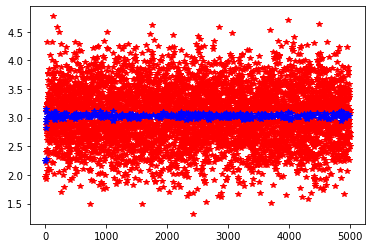

In [9]:
plt.plot(rejected_iterations, np.array(rejected)[:,1], 'r*', label='Rejected Values')
plt.plot(accepted_iterations, np.array(accepted)[:,1], 'b*', label='Accepted Values')

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,  10., 292.,  76.]),
 array([2.25031139, 2.34045645, 2.43060151, 2.52074657, 2.61089163,
        2.70103669, 2.79118174, 2.8813268 , 2.97147186, 3.06161692,
        3.15176198]),
 <a list of 10 Patch objects>)

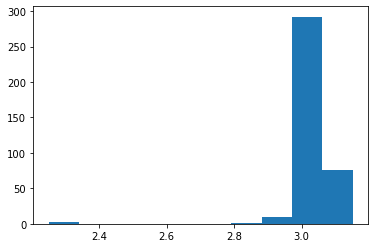

In [11]:
plt.hist(np.array(accepted)[:,1])

In [28]:
'''
Following Section will do MCMC-MH with parameters of interest. 

It will be very similar to the previous problem but we will be estimating the mean as well as the standard devi-
iation.

'''

'\nFollowing Section will do MCMC-MH with parameters of interest. \n\nIt will be very similar to the previous problem but we will be estimating the mean as well as the standard devi-\niation.\n\n'

In [34]:
'''
We will need to change the transition model to a model that returns not only a new standard deviation but also a 
new mean.
'''

std_dev_MCMC = [0.5, 0.5]
transition_model_distribution = lambda x: [np.random.normal(x[0], std_dev_MCMC[0], 1)[0],
                                               np.random.normal(x, std_dev_MCMC[1], 1)[0]]
x = [1,5]
print(transition_model(x))

[array([0.98932041, 4.70534518])]


<function RandomState.normal>

In [38]:
std_guessed = 2
accepted, rejected, accepted_iterations, rejected_iterations = MCMC_MH(data, pop_mean, std_guessed, 5000, 
                                                                      transition_model_distribution)

[10.017494419482139, 2] [10.48163318520786, 9.813199605463668]
0.4680734898644725
[10.017494419482139, 2] [10.3503584987706, 10.29755493042374]
0.6612234151013083
[10.017494419482139, 2] [11.02946918135867, 9.756994793217945]
0.7273627151998016
[10.017494419482139, 2] [10.659266061465804, 10.491850536671395]
0.5326396721801152
[10.017494419482139, 2] [10.127435189525604, 9.661340518820502]
0.30032420215648603
[10.017494419482139, 2] [9.60479627347139, 10.208635199484327]
0.30019019717268924
[10.017494419482139, 2] [11.093943409675735, 10.764431552774242]
0.6441303777976248
[10.017494419482139, 2] [10.015092415686901, 10.600529617247808]
0.9940530138198893
[10.017494419482139, 2] [9.297475570947322, 10.83353058941512]
0.19846374717625515
[10.017494419482139, 2] [10.431460192173342, 9.211077795776891]
0.6833291596143264
[10.017494419482139, 2] [9.72088009914826, 10.36256289378054]
0.15887597367293727
[10.017494419482139, 2] [10.948206462914227, 9.72744953747892]
0.2238833526375108
[10.01

[10.017494419482139, 2] [10.038211704223961, 9.729168487959887]
0.41194509459392115
[10.017494419482139, 2] [10.035881037033013, 10.029723273524281]
0.9059447363427056
[10.017494419482139, 2] [10.787694196839164, 9.582420788416458]
0.31967246232858304
[10.017494419482139, 2] [10.369427973127221, 10.519175503267782]
0.3298687592366767
[10.017494419482139, 2] [9.77169938915353, 10.276140028020462]
0.014757367194430215
[10.017494419482139, 2] [10.118812525551412, 9.811465934216185]
0.1467496942012122
[10.017494419482139, 2] [8.789520296090881, 9.94242075966188]
0.925422042518604
[10.017494419482139, 2] [10.230012913747673, 10.377603483157534]
0.5889527035758296
[10.017494419482139, 2] [10.346776928180294, 10.510576174488907]
0.3318921168818214
[10.017494419482139, 2] [11.031900498077079, 9.521257675509041]
0.20922093508943063
[10.017494419482139, 2] [9.679820510548609, 9.614435944759755]
0.594949021773478
[10.017494419482139, 2] [9.806442902794291, 9.636592871513063]
0.7982413971198945
[1

[10.017494419482139, 2] [10.153383902997264, 10.165144249751796]
0.15821937940192043
[10.017494419482139, 2] [9.343736800245292, 9.756398294092754]
0.7820276265510977
[10.017494419482139, 2] [10.160183298477788, 10.855861280404824]
0.43477601348386063
[10.017494419482139, 2] [10.401085633305819, 11.144840114869943]
0.6953014287260604
[10.017494419482139, 2] [9.74690746418643, 10.415268399354112]
0.7937532364435087
[10.017494419482139, 2] [10.728805016050416, 9.82261649866832]
0.38112362100241437
[10.017494419482139, 2] [9.35315946248264, 10.37296175272508]
0.9052859703846489
[10.017494419482139, 2] [9.899116646366135, 10.1077101339498]
0.8304478334572023
[10.017494419482139, 2] [10.76100529021831, 9.530981350199237]
0.39392318229006273
[10.017494419482139, 2] [11.028574917093039, 8.855970012683224]
0.47918049428235754
[10.017494419482139, 2] [9.706055446991245, 10.092741763391217]
0.05046735579496775
[10.017494419482139, 2] [9.684090601269991, 10.3166941595801]
0.9540487049034174
[10.0

[10.017494419482139, 2] [10.29421635574496, 9.586193728504984]
0.7270525017402989
[10.017494419482139, 2] [10.643238942202379, 10.194873238001815]
0.8086290995582992
[10.017494419482139, 2] [9.57020243197351, 9.753174896048563]
0.30573616037477713
[10.017494419482139, 2] [9.876776992138403, 10.417773845136663]
0.7726603520510995
[10.017494419482139, 2] [10.282297679680278, 9.90449824905448]
0.45875237214972764
[10.017494419482139, 2] [9.87425154956756, 9.995527013884319]
0.06279967917440377
[10.017494419482139, 2] [9.954463193298615, 9.861586404120343]
0.8650828666211088
[10.017494419482139, 2] [8.919007350826757, 10.308128935613526]
0.722134510296764
[10.017494419482139, 2] [9.643751640991487, 9.722568310011704]
0.3256989596089941
[10.017494419482139, 2] [9.331476295980167, 10.058118235035188]
0.15517482965289364
[10.017494419482139, 2] [9.922263707769448, 9.75918927464681]
0.5316320221056215
[10.017494419482139, 2] [9.9163520078513, 10.053658373278685]
0.07483590723809108
[10.0174944

[10.017494419482139, 2] [11.029090729701311, 10.697994563985677]
0.01962416895982222
[10.017494419482139, 2] [9.702939928180747, 9.60489668203089]
0.2800717138259212
[10.017494419482139, 2] [10.355196777992068, 10.567892265033299]
0.8756357770386543
[10.017494419482139, 2] [9.5834817927936, 9.774680139242317]
0.6697753041605649
[10.017494419482139, 2] [10.172704819147075, 10.426874129348512]
0.6608091386500141
[10.017494419482139, 2] [10.42929349531626, 10.46763564311285]
0.8504228653884703
[10.017494419482139, 2] [9.428993624101675, 9.930884170021226]
0.30440072645568517
[10.017494419482139, 2] [10.47387039242324, 9.383623201106888]
0.4655761937100411
[10.017494419482139, 2] [9.357080298042764, 9.24434265476859]
0.3593696854303091
[10.017494419482139, 2] [9.58630012217099, 9.854792765894738]
0.8353479275807955
[10.017494419482139, 2] [9.276048264615248, 10.0893016276415]
0.7741794437019416
[10.017494419482139, 2] [10.03040133780336, 9.697527107800141]
0.15806234991518742
[10.017494419

[10.017494419482139, 2] [10.19685979981029, 10.836069083367207]
0.965946732137285
[10.017494419482139, 2] [10.592027375680356, 11.456923125132024]
0.3340961270409978
[10.017494419482139, 2] [10.608331456811145, 9.187111370489873]
0.2742554501622203
[10.017494419482139, 2] [10.34141385775795, 9.585276913362819]
0.761219722276021
[10.017494419482139, 2] [10.720016809952064, 10.185473903425015]
0.8241648491628416
[10.017494419482139, 2] [9.812714679608247, 10.228758831734053]
0.43885599304441536
[10.017494419482139, 2] [9.503952667573877, 9.478590688293915]
0.915928033505045
[10.017494419482139, 2] [10.129390139736135, 9.566443485057789]
0.40581010954923646
[10.017494419482139, 2] [9.92727116659437, 9.805748009621412]
0.18811037209840575
[10.017494419482139, 2] [9.731612468168365, 10.39148224191701]
0.9917530455614634
[10.017494419482139, 2] [10.101632805965082, 10.138809425180858]
0.5490462065280238
[10.017494419482139, 2] [10.768683573000548, 9.758142261042316]
0.8747075134706076
[10.01

[10.017494419482139, 2] [8.813495969242023, 9.893263163599999]
0.11355570825481909
[10.017494419482139, 2] [10.026194076018731, 10.708090131803315]
0.279776220313803
[10.017494419482139, 2] [10.13959656831228, 10.050021366422104]
0.8632336284482004
[10.017494419482139, 2] [10.978012440358254, 10.686708824863086]
0.908272542257858
[10.017494419482139, 2] [10.011839907429328, 10.107832061689448]
0.971419116841669
[10.017494419482139, 2] [9.330369525425345, 10.206346382587602]
0.7988729730376907
[10.017494419482139, 2] [10.838413261829174, 10.611704206035055]
0.5750604929968525
[10.017494419482139, 2] [10.026460184404177, 9.210171055437236]
0.1543785921526375
[10.017494419482139, 2] [8.667128963826357, 10.524060242920353]
0.09919341979544671
[10.017494419482139, 2] [10.77160982592192, 9.04906817285758]
0.6464291677888699
[10.017494419482139, 2] [10.684605064617159, 9.711377537441297]
0.7199541940846804
[10.017494419482139, 2] [10.427502176476482, 10.279196537161717]
0.49689070833085314
[1

0.6178434634111392
[10.017494419482139, 2] [10.020378773800038, 9.581431248018907]
0.9189249801846805
[10.017494419482139, 2] [10.3419914665014, 9.605876537351302]
0.7814947565315394
[10.017494419482139, 2] [10.02107657024063, 9.286596694837783]
0.4220206137418896
[10.017494419482139, 2] [10.820420477342012, 10.116815450139605]
0.12939659873444675
[10.017494419482139, 2] [9.943897137106115, 11.641708600561437]
0.544729238288744
[10.017494419482139, 2] [10.297481344326917, 10.865609369410993]
0.46908181455397957
[10.017494419482139, 2] [10.054887594177085, 9.811956316883075]
0.23689973024335043
[10.017494419482139, 2] [10.491409541373619, 10.207370837431839]
0.550379098069571
[10.017494419482139, 2] [9.79911651398559, 10.067684362514829]
0.46957860722426803
[10.017494419482139, 2] [9.981401212785817, 9.773648930447903]
0.12815496688358896
[10.017494419482139, 2] [10.122306681349, 9.640728705671084]
0.48915374596566263
[10.017494419482139, 2] [10.634618624276147, 10.498449245625737]
0.13

[10.017494419482139, 2] [9.974382989200905, 9.919892711583584]
0.0313190478966302
[10.017494419482139, 2] [10.876104779793891, 10.272345705048123]
0.6490603757402024
[10.017494419482139, 2] [9.446227390605202, 10.224039148654066]
0.3119979766506671
[10.017494419482139, 2] [10.795911145187175, 10.010994271265789]
0.3081417043994297
[10.017494419482139, 2] [10.173401664464985, 10.335874923186832]
0.5859891113496748
[10.017494419482139, 2] [10.055341406700245, 10.121795250213069]
0.23670587178355762
[10.017494419482139, 2] [9.706390888819145, 9.424533805947378]
0.32881866245382085
[10.017494419482139, 2] [9.983099748955148, 10.617554362266887]
0.19003632635849566
[10.017494419482139, 2] [10.615485419019835, 10.101081071290114]
0.34811834002964526
[10.017494419482139, 2] [8.902262913728936, 9.681198456488575]
0.6116759175684515
[10.017494419482139, 2] [11.495309880880843, 10.042920224379147]
0.7968365385382029
[10.017494419482139, 2] [10.399817380741927, 10.047869990964294]
0.4748363286835

[10.017494419482139, 2] [9.705063675938874, 10.59279833020569]
0.0010764149687479962
[10.017494419482139, 2] [10.177555476786186, 9.731103086044765]
0.7799089935452418
[10.017494419482139, 2] [10.96799275221961, 10.498502795115181]
0.5058799252464037
[10.017494419482139, 2] [9.234940183012423, 10.19415237026103]
0.20237845688530354
[10.017494419482139, 2] [10.09112123646454, 11.077841197691374]
0.3305362094484744
[10.017494419482139, 2] [10.369276644068403, 9.111036643324013]
0.309126569499534
[10.017494419482139, 2] [10.280868889591009, 10.13069075082029]
0.8660492184692483
[10.017494419482139, 2] [9.625689248017865, 10.52298947043311]
0.9985765894878589
[10.017494419482139, 2] [9.773239378470224, 9.98912711169268]
0.025814947109250697
[10.017494419482139, 2] [10.348882307844066, 9.523811122631395]
0.1843922693398613
[10.017494419482139, 2] [9.878579326317011, 9.657082976401107]
0.04769413356145846
[10.017494419482139, 2] [10.143277769205332, 9.774367446259022]
0.2657113271747721
[10.

0.4101361229820184
[10.017494419482139, 2] [10.023010050166437, 9.797405364526693]
0.1691214278862313
[10.017494419482139, 2] [10.209297599447474, 10.445542322485192]
0.07075295527588465
[10.017494419482139, 2] [10.342915267062997, 10.404253340145786]
0.6114935483250444
[10.017494419482139, 2] [10.864386623238632, 9.979817909693207]
0.018936229602065202
[10.017494419482139, 2] [9.261025033079427, 9.989616001794985]
0.051420070871776025
[10.017494419482139, 2] [9.835098691399807, 10.97633123245431]
0.12282874173417668
[10.017494419482139, 2] [10.384595029883172, 9.820419730952118]
0.133672133556351
[10.017494419482139, 2] [11.092476354604043, 9.771940531403228]
0.6708938350513414
[10.017494419482139, 2] [10.092223305423275, 9.786656289076642]
0.7262881751012421
[10.017494419482139, 2] [10.252592177160611, 10.38086763805334]
0.3556022927494652
[10.017494419482139, 2] [9.3130717088181, 10.185048234755126]
0.860360940248646
[10.017494419482139, 2] [10.231488797000429, 10.327064458498063]
0

0.14128335082964438
[10.017494419482139, 2] [9.72463841293301, 10.409478759168652]
0.8493387637611619
[10.017494419482139, 2] [10.174307752605234, 9.177850809486955]
0.29298145534099174
[10.017494419482139, 2] [10.292860225767178, 10.18417986535376]
0.72625811561932
[10.017494419482139, 2] [9.287243036076909, 9.901041399182539]
0.09026994743046479
[10.017494419482139, 2] [9.781623448709967, 10.199855672212438]
0.949230242326113
[10.017494419482139, 2] [10.67074678126102, 10.351569920592015]
0.12355215634113526
[10.017494419482139, 2] [10.029129631545445, 9.630985928558738]
0.07529426040957565
[10.017494419482139, 2] [10.081055413833857, 9.98529011142407]
0.5511842064404804
[10.017494419482139, 2] [9.456931152218106, 10.36886841732539]
0.2652107440180065
[10.017494419482139, 2] [9.271961176848755, 10.19690011325751]
0.6309151006210953
[10.017494419482139, 2] [10.277574497196056, 10.241770139233875]
0.23787888841871307
[10.017494419482139, 2] [10.13461156600336, 9.624953437798402]
0.5743

[10.017494419482139, 2] [10.334168844528442, 9.88567340353028]
0.4506191137429988
[10.017494419482139, 2] [9.932778960921551, 9.240351950635535]
0.7174207679159766
[10.017494419482139, 2] [10.340068173704758, 11.015299595995574]
0.6138235356046299
[10.017494419482139, 2] [9.818114942040205, 10.146913038357374]
0.6737704046502871
[10.017494419482139, 2] [10.170685315068194, 8.897037093366647]
0.8468366480054248
[10.017494419482139, 2] [10.275856500283563, 10.079662320189026]
0.10528495927018067
[10.017494419482139, 2] [9.937954564530918, 9.998771766718583]
0.11618294400101792
[10.017494419482139, 2] [9.987568983344667, 9.506567945223736]
0.8711354064308329
[10.017494419482139, 2] [9.83962434344735, 9.332717468219505]
0.2843639225387433
[10.017494419482139, 2] [9.201805321158018, 9.865554085355104]
0.8386728961974977
[10.017494419482139, 2] [10.005842331037407, 9.464215834068012]
0.15849882655865144
[10.017494419482139, 2] [10.034070847396768, 10.075088462482162]
0.9695550950236014
[10.0

0.3825924478313494
[10.017494419482139, 2] [9.51283508325616, 9.262100957435552]
0.6485801659562983
[10.017494419482139, 2] [9.890600047945934, 9.97543448622641]
0.278787856671486
[10.017494419482139, 2] [10.644528799289866, 9.60862403338844]
0.16797210280497565
[10.017494419482139, 2] [10.02589347157805, 9.96942952779885]
0.23602706703096532
[10.017494419482139, 2] [10.68461466191258, 9.584173241733339]
0.3937274041085893
[10.017494419482139, 2] [9.992460769372752, 10.207454476289135]
0.03182694750638648
[10.017494419482139, 2] [10.389001656382431, 9.604403569886813]
0.18386251989849223
[10.017494419482139, 2] [9.32070096893062, 9.800031581009828]
0.8849490762640724
[10.017494419482139, 2] [10.039876323346368, 10.099131022921368]
0.13775184030620935
[10.017494419482139, 2] [10.350298194734396, 9.128894766105013]
0.6596299808120979
[10.017494419482139, 2] [10.463586512942136, 10.09874365948228]
0.9527395991630468
[10.017494419482139, 2] [10.151194414741239, 9.614207948313137]
0.6124841

0.9740974766623223
[10.017494419482139, 2] [9.952970669945309, 9.966972376822392]
0.13362481113558378
[10.017494419482139, 2] [10.11498517465698, 10.379128065010754]
0.0579801094192155
[10.017494419482139, 2] [8.9332604809121, 10.810407515944682]
0.7661298002443881
[10.017494419482139, 2] [10.872944712065115, 9.833561287623674]
0.8346093320795724
[10.017494419482139, 2] [10.356510160505442, 10.19599240610589]
0.02916864459651136
[10.017494419482139, 2] [9.86418632680095, 9.94474636968761]
0.7571670308877104
[10.017494419482139, 2] [9.545715822066029, 10.315020366011058]
0.6963575218915897
[10.017494419482139, 2] [10.231840501677148, 9.610543722605835]
0.25998501992515777
[10.017494419482139, 2] [8.989913241014635, 10.778371770560362]
0.9771870646367902
[10.017494419482139, 2] [10.083297404076054, 9.613532771359356]
0.31775871776868425
[10.017494419482139, 2] [10.248169544199477, 10.628221717424527]
0.6959559023784995
[10.017494419482139, 2] [9.918284137138102, 10.21872486931372]
0.7330

0.2373725547710902
[10.017494419482139, 2] [10.555830117841305, 10.139701088740795]
0.5871033711385931
[10.017494419482139, 2] [9.682949170881786, 9.864688789600457]
0.2536394229696697
[10.017494419482139, 2] [10.104856816849415, 9.704283858125605]
0.15482888925277516
[10.017494419482139, 2] [9.644192735216755, 9.91806196980497]
0.7314566918778632
[10.017494419482139, 2] [10.257352996236111, 10.560171140146142]
0.4814999222649632
[10.017494419482139, 2] [9.292169700460567, 10.402230778522004]
0.6427875870509323
[10.017494419482139, 2] [10.913348826174229, 10.621609425745724]
0.046047371479277066
[10.017494419482139, 2] [9.98959110395874, 9.240319177687688]
0.9468462654976835
[10.017494419482139, 2] [11.017656520950997, 10.136918691615312]
0.2950975282462559
[10.017494419482139, 2] [10.327623083659795, 9.752730852192288]
0.92472713901738
[10.017494419482139, 2] [10.627749339832938, 9.880763418385579]
0.6197010366016761
[10.017494419482139, 2] [9.608417930736913, 10.718602693504806]
0.02

[10.017494419482139, 2] [10.927232035267554, 9.298265805616856]
0.7334529976849903
[10.017494419482139, 2] [9.96597931812264, 9.950711503841822]
0.06102153837038515
[10.017494419482139, 2] [9.662428256308791, 9.395272893003154]
0.4350947570176985
[10.017494419482139, 2] [10.233960694736231, 9.329745993519532]
0.641043253467524
[10.017494419482139, 2] [9.845146257357873, 10.208659265440923]
0.27882799485946197
[10.017494419482139, 2] [9.82969722277256, 9.610662997228296]
0.7069893063909322
[10.017494419482139, 2] [10.171510132473465, 10.334933964298962]
0.9890654694994435
[10.017494419482139, 2] [9.948899840877433, 10.165161562323924]
0.22205643073716042
[10.017494419482139, 2] [10.209143681069547, 9.478481776775366]
0.8883243407394011
[10.017494419482139, 2] [10.005458986092854, 10.216857693725322]
0.9827987174767443
[10.017494419482139, 2] [9.667837020972923, 9.841989669308642]
0.3553997637222389
[10.017494419482139, 2] [9.996357900581193, 10.241085519056742]
0.4052535614926711
[10.01

0.5105839847272092
[10.017494419482139, 2] [9.93658078156971, 10.52673501900526]
0.7643543661513973
[10.017494419482139, 2] [10.256875054461148, 10.005573974647033]
0.6038885595342796
[10.017494419482139, 2] [9.474219721254965, 10.039860817105836]
0.8503903827695591
[10.017494419482139, 2] [9.700359670610041, 10.405790281394985]
0.9386301521719161
[10.017494419482139, 2] [9.921070563943035, 10.003764105521746]
0.5352896649850489
[10.017494419482139, 2] [10.688417052806184, 9.731971308367587]
0.15079709723040824
[10.017494419482139, 2] [10.596829226130039, 10.32506780045105]
0.16747156453447143
[10.017494419482139, 2] [9.937876941013831, 9.763680198458724]
0.43826607144886065
[10.017494419482139, 2] [10.318174103253957, 9.630043451574304]
0.3326506604029814
[10.017494419482139, 2] [10.709204424490318, 10.272274015697898]
0.7852337176957569
[10.017494419482139, 2] [9.79804734640205, 10.677982135776025]
0.411666546703513
[10.017494419482139, 2] [9.747637833202493, 10.097835010014528]
0.82

[10.017494419482139, 2] [10.37767489523295, 9.797470181136232]
0.4527627951297257
[10.017494419482139, 2] [9.333046524967223, 9.974813826597979]
0.6223703341892807
[10.017494419482139, 2] [8.944862742696188, 10.203216983998074]
0.8068445102267412
[10.017494419482139, 2] [9.804436203648624, 9.854402205909592]
0.8145952330710728
[10.017494419482139, 2] [9.977648951516304, 9.986277878030506]
0.8825816014616126
[10.017494419482139, 2] [9.698388019144927, 9.44095589407138]
0.748929366716516
[10.017494419482139, 2] [9.194263664419346, 9.752635024802363]
0.8792722124589671
[10.017494419482139, 2] [9.76693541563292, 10.359929460852769]
0.756079614803954
[10.017494419482139, 2] [10.091882603506251, 10.401651343001339]
0.3382563779979991
[10.017494419482139, 2] [10.651364579788545, 9.3470669597382]
0.7124377962895386
[10.017494419482139, 2] [9.383035063214644, 10.154348687503425]
0.5685787767338315
[10.017494419482139, 2] [9.073251071245506, 10.061063936170973]
0.6421207458968843
[10.01749441948

[10.017494419482139, 2] [10.702276285036248, 10.466866649250733]
0.7856924856369785
[10.017494419482139, 2] [10.515077676721722, 9.546521326338299]
0.821009682776852
[10.017494419482139, 2] [10.227397624179757, 10.363767336225978]
0.8869451389504674
[10.017494419482139, 2] [9.745578915115312, 9.608218957397098]
0.6394216115361142
[10.017494419482139, 2] [9.314709967721152, 10.629903438816411]
0.38403862802096633
[10.017494419482139, 2] [10.393888623952813, 9.202614392963165]
0.20601221151695248
[10.017494419482139, 2] [10.009512429380697, 9.699189576270932]
0.47022273251718594
[10.017494419482139, 2] [9.009579780773691, 10.374134009022198]
0.5979203040297184
[10.017494419482139, 2] [10.108177735111347, 9.753254619193385]
0.821775651703382
[10.017494419482139, 2] [10.729254836513883, 9.450348611490188]
0.4586813361352039
[10.017494419482139, 2] [10.411098517016471, 9.51140700728883]
0.05002779616083852
[10.017494419482139, 2] [9.417849445506343, 10.413423291838512]
0.850574452219763
[10

[10.017494419482139, 2] [10.1287121448665, 10.048327260869684]
0.6337777385105349
[10.017494419482139, 2] [9.913040438781389, 10.012212302720279]
0.8154794283027668
[10.017494419482139, 2] [10.388765752076454, 9.36430761054667]
0.7189177323354422
[10.017494419482139, 2] [10.029416214906963, 10.735903063280691]
0.3656399697146284
[10.017494419482139, 2] [9.058844603809025, 9.990216635266496]
0.6468189486165354
[10.017494419482139, 2] [9.992406161636792, 9.955842786230225]
0.03346405864195057
[10.017494419482139, 2] [10.102187524714395, 10.73150187929265]
0.37138265341641297
[10.017494419482139, 2] [9.402573124753733, 10.235329111224871]
0.03587203688703744
[10.017494419482139, 2] [10.510997681156745, 10.824117147252982]
0.5981342533316901
[10.017494419482139, 2] [10.39196958550354, 9.417746419312405]
0.478291128502193
[10.017494419482139, 2] [9.976422200767676, 9.361758896319131]
0.41149508112513067
[10.017494419482139, 2] [9.973261336024215, 10.446716067250097]
0.05373200545503776
[10.

0.22099193235362014
[10.017494419482139, 2] [11.497476736875015, 10.537300973046184]
0.19228472134829022
[10.017494419482139, 2] [9.39980868069445, 10.35472479987039]
0.04517222447224056
[10.017494419482139, 2] [9.364940752394958, 10.554187708720221]
0.263561144566243
[10.017494419482139, 2] [9.946319182058845, 9.681355741383854]
0.22350668202968293
[10.017494419482139, 2] [9.37711510155813, 9.490977275971423]
0.017786146008631265
[10.017494419482139, 2] [9.617958708962956, 9.940262423533307]
0.1531308147128536
[10.017494419482139, 2] [9.869726902715815, 9.333657317837426]
0.8304028802775598
[10.017494419482139, 2] [8.810967642499387, 10.001860529760934]
0.19815676812724148
[10.017494419482139, 2] [10.215793090461593, 10.210011026242956]
0.6850625268198491
[10.017494419482139, 2] [10.005458934451575, 9.992753669137903]
0.4105763220811669
[10.017494419482139, 2] [9.954115662689382, 10.132735792206939]
0.8146050941338701
[10.017494419482139, 2] [9.54192291076717, 9.177385305651825]
0.527

[10.017494419482139, 2] [10.817856712660685, 9.986950643325654]
0.003423643016899236
[10.017494419482139, 2] [9.702331888964396, 10.18431856518686]
0.5900875151327419
[10.017494419482139, 2] [10.603010608714264, 10.287402115134372]
0.6028217418466373
[10.017494419482139, 2] [9.49600498679741, 9.784968575506971]
0.5985603724140907
[10.017494419482139, 2] [11.010382778946983, 9.480185012743899]
0.15377809625652228
[10.017494419482139, 2] [9.288131410358856, 10.057959176155869]
0.6422959433062128
[10.017494419482139, 2] [9.151510052883653, 10.00609323790939]
0.7135293237256538
[10.017494419482139, 2] [9.659027253308862, 10.003149492297583]
0.11255696821852856
[10.017494419482139, 2] [10.108306362949866, 9.20483144364045]
0.5173855884278258
[10.017494419482139, 2] [10.041989622148046, 9.933348088598382]
0.22675291232372674
[10.017494419482139, 2] [10.117420169952123, 10.605139995731143]
0.3260996504183521
[10.017494419482139, 2] [10.011204677993703, 10.010375247628614]
0.5267825656351299
[

[10.017494419482139, 2] [9.265427860045067, 9.467681987750314]
0.26675517696757844
[10.017494419482139, 2] [9.751781138846649, 10.183225829058753]
0.9137600741323315
[10.017494419482139, 2] [9.693483804947888, 9.88400433726722]
0.5038417106237817
[10.017494419482139, 2] [10.812538514034584, 9.608557045245814]
0.7472492452598557
[10.017494419482139, 2] [10.21691604993665, 9.914951378478923]
0.18412498327918847
[10.017494419482139, 2] [10.159861114108374, 10.13003366126994]
0.05946651097704969
[10.017494419482139, 2] [9.19222103634049, 10.126481556545993]
0.30842293981743873
[10.017494419482139, 2] [9.63520864712741, 9.401166524603267]
0.0926252665222993
[10.017494419482139, 2] [9.555732778417145, 9.894193521759119]
0.6934113267230928
[10.017494419482139, 2] [10.112915643517168, 9.682917806185742]
0.881106293637106
[10.017494419482139, 2] [9.939457916984386, 9.649650038083369]
0.15904427652919884
[10.017494419482139, 2] [10.115818516928778, 10.459071843176186]
0.2643524234683825
[10.0174

0.42232063339699943
[10.017494419482139, 2] [10.16310729851022, 9.499421017304954]
0.7507883884269546
[10.017494419482139, 2] [10.628297218286813, 11.103995286190091]
0.14812940600835356
[10.017494419482139, 2] [11.070968622769573, 10.592149533376931]
0.02784616879105839
[10.017494419482139, 2] [10.325834493918176, 10.070071442157408]
0.9843265969956061
[10.017494419482139, 2] [9.993001152310764, 9.67636762238257]
0.39738830888780274
[10.017494419482139, 2] [9.59512109470114, 10.660979928119792]
0.8574686799281624
[10.017494419482139, 2] [10.103905648573951, 9.460573092533568]
0.6585599586809918
[10.017494419482139, 2] [10.097811244116093, 9.798509377899881]
0.8637432304549795
[10.017494419482139, 2] [9.790917502260385, 10.144038123416033]
0.8582090523788466
[10.017494419482139, 2] [9.959000446138454, 9.328933974479195]
0.2306039194420071
[10.017494419482139, 2] [10.276145199413964, 10.360311138186043]
0.2565948906468293
[10.017494419482139, 2] [9.41242358241846, 10.346883444577937]
0.

0.3943324698694254
[10.017494419482139, 2] [9.442438927840294, 10.852139081706856]
0.36713824203841094
[10.017494419482139, 2] [10.344229088054908, 9.334329840936377]
0.7608876220244244
[10.017494419482139, 2] [11.029297722179017, 10.289020381088099]
0.6867694062994678
[10.017494419482139, 2] [9.372375433781682, 10.035544718335958]
0.41163898440011437
[10.017494419482139, 2] [10.55866116576687, 9.651985091843255]
0.0029326803619658115
[10.017494419482139, 2] [10.39405364025175, 9.993645640891385]
0.8269123466006068
[10.017494419482139, 2] [9.875021841592922, 10.07819392038158]
0.21054223354514523
[10.017494419482139, 2] [10.67683879210164, 10.048809046392085]
0.7693900280069091
[10.017494419482139, 2] [10.313387059299835, 10.278326054033238]
0.5802670839327206
[10.017494419482139, 2] [9.990557251569612, 10.457321592543991]
0.7696611169866311
[10.017494419482139, 2] [10.24546187537135, 10.263105330362793]
0.6297777714744239
[10.017494419482139, 2] [11.09381453997962, 10.03336928548086]


[10.017494419482139, 2] [10.24798781050379, 9.61430553812471]
0.7232089628579067
[10.017494419482139, 2] [10.011199639465426, 9.927957670850441]
0.07154802449504571
[10.017494419482139, 2] [10.687433835882503, 10.530587815504775]
0.7912546592854269
[10.017494419482139, 2] [9.71846046600515, 10.688646691127584]
0.4891735219746509
[10.017494419482139, 2] [10.40183677402784, 9.96848166352116]
0.42850432311775377
[10.017494419482139, 2] [9.772178827738903, 9.892704878410461]
0.8135693289856232
[10.017494419482139, 2] [9.637341688709029, 10.508869201361168]
0.7280587277126112
[10.017494419482139, 2] [10.203407295041059, 9.450391834342426]
0.47983050456276877
[10.017494419482139, 2] [10.163465538912707, 10.363290504000634]
0.8388682247793995
[10.017494419482139, 2] [9.752341499433149, 9.195650431807326]
0.8081645469468896
[10.017494419482139, 2] [9.443670207186528, 10.001429456454593]
0.13824116441667367
[10.017494419482139, 2] [8.967406440330155, 9.944341978786921]
0.3936048889931151
[10.01

[10.017494419482139, 2] [10.583788859035796, 10.338540220755295]
0.7264486536656403
[10.017494419482139, 2] [10.171278595813785, 10.764625657129805]
0.2915334488040766
[10.017494419482139, 2] [9.548411028428003, 9.39988124934615]
0.18107072772332045
[10.017494419482139, 2] [9.574742406061372, 10.358644713676037]
0.4949816618185978
[10.017494419482139, 2] [9.526473309859648, 9.10369737482782]
0.46318407628916347
[10.017494419482139, 2] [9.442172129270922, 10.209156083387475]
0.26563147694083356
[10.017494419482139, 2] [10.041946031160721, 10.20475562307736]
0.023547644862924266
[10.017494419482139, 2] [9.706688996792622, 9.824589949969383]
0.4438358546467345
[10.017494419482139, 2] [9.124011852816754, 10.45020859656275]
0.294983137016986
[10.017494419482139, 2] [9.72113867172809, 10.246494536406496]
0.21618530266822522
[10.017494419482139, 2] [10.473050370718509, 8.996810020403146]
0.8615469645128843
[10.017494419482139, 2] [9.721619203746673, 10.10585508469096]
0.06466785761943794
[10.

[10.017494419482139, 2] [9.586058432878533, 10.554633720717407]
0.9307091105783925
[10.017494419482139, 2] [9.76141500434917, 10.181620949121006]
0.8873580746594065
[10.017494419482139, 2] [9.790999958105786, 10.048171947046496]
0.8882564698502134
[10.017494419482139, 2] [10.098419025389376, 10.283974563889538]
0.6320194989878302
[10.017494419482139, 2] [9.613489834278125, 9.729250632805662]
0.638864780007263
[10.017494419482139, 2] [10.716474891918937, 9.993561232822833]
0.3587085788702862
[10.017494419482139, 2] [9.86987754087652, 9.577826705854827]
0.6198118955625124
[10.017494419482139, 2] [10.837996357559957, 10.216256508176976]
0.9922206910373228
[10.017494419482139, 2] [10.477976760950456, 10.835198107566965]
0.7399482510552301
[10.017494419482139, 2] [9.989467857237056, 10.052934185541345]
0.39805827455568976
[10.017494419482139, 2] [9.643045201505448, 9.31378956601072]
0.5822738132473679
[10.017494419482139, 2] [9.766034307183078, 9.759730276492137]
0.6092116504829225
[10.0174

0.8064692248701356
[10.017494419482139, 2] [10.073604955516224, 11.308061820089534]
0.04520196786182962
[10.017494419482139, 2] [11.184125413881917, 10.292713240547334]
0.39226450270421187
[10.017494419482139, 2] [9.869093998495327, 9.620571667548443]
0.856241358232941
[10.017494419482139, 2] [10.855320740006043, 9.970838752018661]
0.7040514301833836
[10.017494419482139, 2] [10.630136988082606, 10.99859548981648]
0.5851148448890813
[10.017494419482139, 2] [11.014278622859155, 10.239032959256724]
0.6238693323252865
[10.017494419482139, 2] [10.204580765437068, 10.525715123892194]
0.2293819250944641
[10.017494419482139, 2] [10.492541338651568, 9.905666994264857]
0.7674288935006067
[10.017494419482139, 2] [10.266922058155027, 10.665828405559008]
0.9884035078463007
[10.017494419482139, 2] [10.72065949601896, 9.88864935079415]
0.8611776068584922
[10.017494419482139, 2] [10.25209243010388, 9.58178604046565]
0.5455723613953527
[10.017494419482139, 2] [10.669027620167585, 10.183808709200491]
0.

[10.017494419482139, 2] [10.209033408825677, 9.63141851933381]
0.48009006864479153
[10.017494419482139, 2] [10.476738403933876, 10.24878608524024]
0.44230666149689735
[10.017494419482139, 2] [10.082944149250526, 9.481207236137056]
0.5874768959018929
[10.017494419482139, 2] [10.93024531568782, 9.676094617330595]
0.19502660024435936
[10.017494419482139, 2] [10.258070808290235, 9.993905996211328]
0.9883458415082084
[10.017494419482139, 2] [9.620041193807644, 10.73462530886852]
0.5133476188985051
[10.017494419482139, 2] [10.811942381416655, 9.805342887249454]
0.7711316457191625
[10.017494419482139, 2] [9.306345051141967, 10.726644523466117]
0.4289985520741354
[10.017494419482139, 2] [10.25321569194603, 10.00851828914881]
0.6233428436342054
[10.017494419482139, 2] [10.216263979383895, 9.964939160522736]
0.8779451424634325
[10.017494419482139, 2] [9.618999218174288, 10.103023742337802]
0.373871790424148
[10.017494419482139, 2] [10.45733078478306, 10.870300388905857]
0.16717403314646218
[10.0

[10.017494419482139, 2] [10.503279082471291, 11.021402045919729]
0.6263849338946282
[10.017494419482139, 2] [9.943518417841823, 9.761705888517467]
0.05609456745738339
[10.017494419482139, 2] [10.185172927927477, 9.701289679277705]
0.0020345689283323143
[10.017494419482139, 2] [10.122133666489258, 10.031804117604347]
0.9159523407400442
[10.017494419482139, 2] [10.079333211760233, 9.634926945712575]
0.11586147554308401
[10.017494419482139, 2] [10.451310137725244, 9.916639809925881]
0.06135031434061189
[10.017494419482139, 2] [9.965132584925218, 9.720504153584479]
0.9820887988729387
[10.017494419482139, 2] [9.071858320619638, 9.80059923038587]
0.28788368367688955
[10.017494419482139, 2] [9.638646090455666, 10.47383472147791]
0.2689097491098529
[10.017494419482139, 2] [10.83637775616267, 9.026043190492182]
0.2411811421379928
[10.017494419482139, 2] [10.112806855308294, 9.304253378357668]
0.5517292957796182
[10.017494419482139, 2] [10.129203181047657, 10.062930439466918]
0.3404864576313711


0.019793567434131853
[10.017494419482139, 2] [9.476912042298714, 10.300890633446471]
0.3668645862474238
[10.017494419482139, 2] [10.515844530018528, 10.357741302638681]
0.8815927774253847
[10.017494419482139, 2] [11.377422322791395, 10.559077696503389]
0.06436919226518212
[10.017494419482139, 2] [10.025776586018527, 10.063932455798396]
0.3901730255594641
[10.017494419482139, 2] [11.008759103224266, 10.107091251424613]
0.47423108583906237
[10.017494419482139, 2] [10.965932729119608, 9.724902775964416]
0.595433866643341
[10.017494419482139, 2] [10.398636554699006, 10.859558809851196]
0.6478780602469467
[10.017494419482139, 2] [10.13804945736128, 10.764801590992986]
0.5746366716196611
[10.017494419482139, 2] [9.751667233532933, 10.38525890216632]
0.043506210167549964
[10.017494419482139, 2] [9.942068000999058, 9.575419577698897]
0.574212176517913
[10.017494419482139, 2] [10.748259282273304, 9.66160647361139]
0.7362066107920813
[10.017494419482139, 2] [10.370547912836896, 10.81800464396294

[10.017494419482139, 2] [10.819166787555067, 10.425573109348818]
0.6464031350746756
[10.017494419482139, 2] [10.357135114400307, 10.097542597598837]
0.15059873248005462
[10.017494419482139, 2] [8.986350735576577, 10.161085792815761]
0.6548435206558572
[10.017494419482139, 2] [10.341861447700815, 10.243764943473103]
0.7109399650808443
[10.017494419482139, 2] [10.602464433613012, 9.47195173767534]
0.5759852536346421
[10.017494419482139, 2] [9.91688443865553, 10.083981757149148]
0.9515134013423762
[10.017494419482139, 2] [9.17017366062678, 9.494636399579534]
0.5499313052476883
[10.017494419482139, 2] [9.96949367921632, 9.439212098586827]
0.33595238155608453
[10.017494419482139, 2] [10.839294957309793, 10.3578354189966]
0.6317366340584064
[10.017494419482139, 2] [9.62122169202863, 8.911467527629487]
0.6292137603311033
[10.017494419482139, 2] [9.321214738517243, 10.269233752075012]
0.7331058301422366
[10.017494419482139, 2] [10.597150308612058, 9.542579632152277]
0.5516512714180073
[10.0174

0.24891699267368084
[10.017494419482139, 2] [10.249032723746504, 10.874133353999758]
0.6341375988796077
[10.017494419482139, 2] [10.812586867285875, 10.508333609984117]
0.868031279486133
[10.017494419482139, 2] [9.979683914815652, 10.94803068329071]
0.46408558888653295
[10.017494419482139, 2] [9.469011111393918, 10.43105831748052]
0.54398644492305
[10.017494419482139, 2] [10.13823014375336, 10.755963637479589]
0.8393756483917398
[10.017494419482139, 2] [8.88477467617184, 9.701072091972865]
0.9665908684144178
[10.017494419482139, 2] [9.922977957228358, 9.900748140474814]
0.6053136020884423
[10.017494419482139, 2] [10.484130317102107, 10.125750869061715]
0.1049637911268646
[10.017494419482139, 2] [9.697887313451295, 9.649245313754502]
0.6979454986771595
[10.017494419482139, 2] [9.793865290081074, 10.000278032452574]
0.10129426941043573
[10.017494419482139, 2] [10.24822380586748, 10.023750445351263]
0.3227734806262189
[10.017494419482139, 2] [9.426525388870152, 9.175101130217111]
0.420556

[10.017494419482139, 2] [10.166772496603638, 9.841465638745042]
0.5014018782549374
[10.017494419482139, 2] [9.66370434199325, 10.272340713154456]
0.5398721833492107
[10.017494419482139, 2] [9.702327832127125, 9.982665696500042]
0.09904802117966083
[10.017494419482139, 2] [10.64165317401689, 9.450836081801055]
0.22195423236179534
[10.017494419482139, 2] [10.096020899365087, 10.980997524584303]
0.9716197478757859
[10.017494419482139, 2] [9.30197339945824, 9.233864136324362]
0.49496181814564155
[10.017494419482139, 2] [9.613031425444419, 10.575431898416603]
0.2719429646223356
[10.017494419482139, 2] [10.50689834326436, 10.087704673445307]
0.0038156329904858177
[10.017494419482139, 2] [10.089101182895151, 9.689771517558716]
0.5843068832685977
[10.017494419482139, 2] [9.640484805333305, 9.359593983173013]
0.20579083785886387
[10.017494419482139, 2] [9.619097050993156, 10.283067817215379]
0.7283709979378596
[10.017494419482139, 2] [10.521512336089126, 10.134661826891033]
0.774696394629617
[1

[10.017494419482139, 2] [10.504800641322838, 9.991395218701797]
0.23558716127349288
[10.017494419482139, 2] [9.26673110955386, 10.569546774900797]
0.6630896321107017
[10.017494419482139, 2] [10.788957783412338, 9.868612555316705]
0.06827807874364811
[10.017494419482139, 2] [9.301211545660271, 10.76708955022121]
0.8013875543461787
[10.017494419482139, 2] [9.597775215749728, 10.788670505351835]
0.03399210551169407
[10.017494419482139, 2] [9.680155432187306, 10.16026811109486]
0.6902968579412442
[10.017494419482139, 2] [9.604598407600747, 9.508037658577353]
0.7999724986165376
[10.017494419482139, 2] [10.066344578783623, 10.330009783064531]
0.8810221300463061
[10.017494419482139, 2] [9.535295567246129, 9.959918267240495]
0.3131284666296871
[10.017494419482139, 2] [10.25005147694939, 9.966518055470784]
0.8279525143903341
[10.017494419482139, 2] [9.510704242767236, 9.404248518308489]
0.07542718708639506
[10.017494419482139, 2] [10.296227005861338, 10.410479400408628]
0.633872424570017
[10.01

[10.017494419482139, 2] [10.378138401815487, 10.319438388561474]
0.8121234144091617
[10.017494419482139, 2] [9.737603389727399, 9.288241449249774]
0.5309987199008832
[10.017494419482139, 2] [9.067464493990796, 9.906499406438428]
0.40376023233076286
[10.017494419482139, 2] [10.371431233231494, 9.748432883699294]
0.29583066697346927
[10.017494419482139, 2] [9.69588568211677, 10.601773556470269]
0.5828335445782894
[10.017494419482139, 2] [10.551850249357663, 10.099364998811229]
0.09480544736617391
[10.017494419482139, 2] [9.972325750342755, 10.077786088133287]
0.3449711144532853
[10.017494419482139, 2] [10.125503471706477, 10.327854055026123]
0.7742220768125686
[10.017494419482139, 2] [10.247446085824818, 9.960595396372995]
0.2265661972370362
[10.017494419482139, 2] [9.864242682232833, 9.681753883473418]
0.1254511308771319
[10.017494419482139, 2] [9.285355689496068, 10.102384971111354]
0.4469926964187598
[10.017494419482139, 2] [10.309375041594949, 10.567009620324248]
0.8863701715530082
[

[10.017494419482139, 2] [10.56690839295093, 10.066663657637982]
0.1876254914079981
[10.017494419482139, 2] [9.637723082661589, 9.535723139853074]
0.2130854557725761
[10.017494419482139, 2] [10.215291340022228, 9.258017438421529]
0.7502351722341206
[10.017494419482139, 2] [10.71485536162627, 10.171900741231056]
0.7197178899195249
[10.017494419482139, 2] [10.737070546765816, 9.503351383887773]
0.3790555938708794
[10.017494419482139, 2] [9.85437424469017, 10.51373884460013]
0.5722537727561637
[10.017494419482139, 2] [9.841742124785712, 10.52990162632568]
0.8910570848526019
[10.017494419482139, 2] [9.964818404582967, 9.7841163723252]
0.3090194393268795
[10.017494419482139, 2] [9.478288000284818, 10.092889226270957]
0.9609997323062954
[10.017494419482139, 2] [10.898498223015865, 9.87197738574757]
0.5396838740147106
[10.017494419482139, 2] [10.023898142997185, 9.723935153535493]
0.28631111865958614
[10.017494419482139, 2] [10.252749574167334, 10.537943680880742]
0.1610557007343496
[10.017494

0.14986593204223841
[10.017494419482139, 2] [9.985673059464919, 9.290102420502548]
0.7748617860715888
[10.017494419482139, 2] [9.611490475052895, 9.846559678061935]
0.5264574603977619
[10.017494419482139, 2] [9.962677857724039, 10.184633427681671]
0.2368529744472584
[10.017494419482139, 2] [10.392099417249083, 10.288510616218504]
0.27501773778967253
[10.017494419482139, 2] [9.846798147638822, 9.767369356116976]
0.9783397759308302
[10.017494419482139, 2] [11.14054583839505, 9.968980998098294]
0.11918085558294556
[10.017494419482139, 2] [10.445023264851299, 10.510545969029442]
0.22434439033100873
[10.017494419482139, 2] [10.302841319932204, 10.122259953151758]
0.8846544587662923
[10.017494419482139, 2] [10.677079974403927, 10.36890168540903]
0.6952308990341644
[10.017494419482139, 2] [10.322545616126652, 9.283134671346826]
0.4826650654182495
[10.017494419482139, 2] [10.277877104986999, 10.387591866784545]
0.4876011266827607
[10.017494419482139, 2] [10.157820677656979, 10.36520619776184]


0.66664259753762
[10.017494419482139, 2] [10.253401632941483, 10.152490676568592]
0.27352132962907993
[10.017494419482139, 2] [10.265044385149046, 10.364671113923931]
0.7413524640961714
[10.017494419482139, 2] [9.44813423653491, 9.366177935402298]
0.755547580910684
[10.017494419482139, 2] [9.58109125082152, 10.571544941044564]
0.947632918971183
[10.017494419482139, 2] [10.962569424626558, 9.559006589910467]
0.003577949773638789
[10.017494419482139, 2] [9.566301454373452, 10.314492538975811]
0.9313938951427222
[10.017494419482139, 2] [9.516880720995262, 10.684206223842425]
0.5559660135005319
[10.017494419482139, 2] [10.298473254508087, 10.456973103199147]
0.22555536734742998
[10.017494419482139, 2] [10.016044463795064, 9.510942528547153]
0.2108511213641988
[10.017494419482139, 2] [9.5665587774576, 10.492690527800132]
0.8135168842091806
[10.017494419482139, 2] [10.315775881909108, 10.424346026692668]
0.816146050911393
[10.017494419482139, 2] [10.247753849908785, 9.635978571587668]
0.1285

0.5452650008266268
[10.017494419482139, 2] [9.929611680202768, 9.411194322928168]
0.08877439611880378
[10.017494419482139, 2] [10.307778780654234, 9.408039480947473]
0.8417181596961847
[10.017494419482139, 2] [10.467238857286084, 10.749746594599998]
0.18324011158333997
[10.017494419482139, 2] [9.993897479990828, 10.299798019648739]
0.8123544309010637
[10.017494419482139, 2] [10.34326896477311, 9.64361702218564]
0.3287479275195673
[10.017494419482139, 2] [10.433440020679306, 9.98707489456069]
0.1851651281448804
[10.017494419482139, 2] [9.386293899118314, 10.985042700640147]
0.8868709651128418
[10.017494419482139, 2] [10.267401319568599, 9.643003234487221]
0.14199329235383207
[10.017494419482139, 2] [8.605971012786956, 9.576634791541553]
0.3562518921831205
[10.017494419482139, 2] [9.770803310309482, 9.304337585099951]
0.22472571292268684
[10.017494419482139, 2] [10.62322602258009, 9.65433542679788]
0.04383631253177811
[10.017494419482139, 2] [10.099287990929765, 10.308858839633132]
0.186

0.7904064605406222
[10.017494419482139, 2] [9.376640994165133, 9.29333735655622]
0.5719811148982269
[10.017494419482139, 2] [9.97467632536854, 9.9731891250732]
0.1986209293389466
[10.017494419482139, 2] [10.503515661721192, 9.171237178900698]
0.617539595259202
[10.017494419482139, 2] [9.431270216466292, 9.976934723148474]
0.6780237564508232
[10.017494419482139, 2] [10.175199298070549, 10.07688184460713]
0.18170482074962313
[10.017494419482139, 2] [9.815931896768722, 9.63035838961187]
0.8133915702738689
[10.017494419482139, 2] [10.64794063586711, 10.109349178217695]
0.7014408394773448
[10.017494419482139, 2] [9.76586067600735, 9.988920261800951]
0.9745539220317376
[10.017494419482139, 2] [9.825103795546772, 9.82016446587861]
0.019329337347161912
[10.017494419482139, 2] [10.830102957286167, 10.265990666188202]
0.28200335443371616
[10.017494419482139, 2] [9.435481767448383, 9.883430050073962]
0.1857263715744879
[10.017494419482139, 2] [9.54251628398213, 9.998568452205339]
0.01159302481010

0.7202283691592658
[10.017494419482139, 2] [10.018863385949546, 9.308969199722737]
0.3545412635226267
[10.017494419482139, 2] [9.966182188000177, 9.766442065429295]
0.16552285175129133
[10.017494419482139, 2] [10.587611495055242, 9.099696054510886]
0.5411243168954906
[10.017494419482139, 2] [9.730173208397698, 10.031020358821205]
0.8536825057706502
[10.017494419482139, 2] [9.377925481848454, 10.493180963961494]
0.8303969271642135
[10.017494419482139, 2] [10.13608907425379, 10.34204134598989]
0.6046125069828203
[10.017494419482139, 2] [10.676514450588028, 10.239864090502387]
0.10848270680530048
[10.017494419482139, 2] [9.908755796443854, 10.94833318525092]
0.04113936284872466
[10.017494419482139, 2] [9.119438402389973, 10.005351720464676]
0.10525089186979819
[10.017494419482139, 2] [9.712873032208218, 9.988440335204475]
0.76311963935197
[10.017494419482139, 2] [9.685091441551394, 9.721500608843442]
0.25885517017931725
[10.017494419482139, 2] [10.238258744896944, 8.994483083987365]
0.385

In [37]:
len(accepted)
len(rejected)

49990